In [4]:
import pandas as pd
import numpy as np

# Read the teacher data from the CSV file
def read_teacher_data(file_path):
    return pd.read_csv(file_path)

# Assign faculty members to exam rooms based on department expertise and time slots
def assign_faculty_to_rooms(teacher_data, num_rooms, num_time_slots, num_days):
    teacher_count = len(teacher_data)
    if teacher_count == 0:
        print("Error: No teacher data available.")
        return {}
    
    # Shuffle the teacher data
    teacher_data = teacher_data.sample(frac=1).reset_index(drop=True)
    
    # Sort teacher data by department expertise
    teacher_data = teacher_data.sort_values(by='Dept')
    
    # Determine the number of teachers to assign per room per time slot per day
    teachers_per_slot = int(np.ceil(teacher_count / (num_rooms * num_time_slots * num_days)))
    
    # Split the teacher data into two halves for each time slot
    teacher_data_1, teacher_data_2 = np.array_split(teacher_data, 2)
    
    room_allocations = []
    for day in range(1, num_days + 1):
        for slot in range(1, num_time_slots + 1):
            for room in range(1, num_rooms + 1):
                if slot == 1:
                    teachers = teacher_data_1.sample(teachers_per_slot).reset_index(drop=True)
                else:
                    teachers = teacher_data_2.sample(teachers_per_slot).reset_index(drop=True)
                for index, teacher in teachers.iterrows():
                    room_allocations.append([day, slot, room, teacher['Dept'], teacher['Name']])
    
    return room_allocations

# Main program
def main():
    file_path = 'Teachers.csv'
    num_rooms = 30  # Number of exam rooms
    num_time_slots = 2  # Number of time slots in a day
    num_days = 2  # Number of days
    
    teacher_data = read_teacher_data(file_path)
    room_allocations = assign_faculty_to_rooms(teacher_data, num_rooms, num_time_slots, num_days)
    
    if room_allocations:
        # Output room allocations
        for allocation in room_allocations:
            print(allocation)
        
        # Save the room allocations to a CSV file
        df = pd.DataFrame(room_allocations, columns=['day', 'time slot', 'room no', 'dept', 'name'])
        df.to_csv('facultyassign.csv', index=False)

main()


[1, 1, 1, 'BBA', 'Daniel Turner']
[1, 1, 2, 'AI', 'James Wilson']
[1, 1, 3, 'BBA', 'David Martinez']
[1, 1, 4, 'AI', 'James Wilson']
[1, 1, 5, 'BBA', 'Daniel Turner']
[1, 1, 6, 'BBA', 'Daniel Turner']
[1, 1, 7, 'AI', 'James Wilson']
[1, 1, 8, 'BBA', 'Daniel Turner']
[1, 1, 9, 'BBA', 'Matthew Perez']
[1, 1, 10, 'AI', 'Charlotte Evans']
[1, 1, 11, 'AI', 'James Wilson']
[1, 1, 12, 'AI', 'Sophia Lopez']
[1, 1, 13, 'AI', 'Alexander Scott']
[1, 1, 14, 'AI', 'Sophia Lopez']
[1, 1, 15, 'AI', 'Sarah Clark']
[1, 1, 16, 'AI', 'James Wilson']
[1, 1, 17, 'AI', 'Matthew Nelson']
[1, 1, 18, 'CS', 'Emma White']
[1, 1, 19, 'AI', 'Matthew Nelson']
[1, 1, 20, 'AI', 'Alexander Scott']
[1, 1, 21, 'AI', 'Sophia Lopez']
[1, 1, 22, 'AI', 'Sarah Clark']
[1, 1, 23, 'AI', 'Charlotte Evans']
[1, 1, 24, 'AI', 'William Rodriguez']
[1, 1, 25, 'AI', 'James Wilson']
[1, 1, 26, 'CS', 'Ismail']
[1, 1, 27, 'BBA', 'David Martinez']
[1, 1, 28, 'BBA', 'David Martinez']
[1, 1, 29, 'BBA', 'David Martinez']
[1, 1, 30, 'AI', 'A

c:\Users\mkhub\Downloads\Q3_UnSupervised-Learning\UnSupervised-Learning\env\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Get the current directory
current_dir = os.getcwd()

# File names
students_file_name = "Students.csv"
teachers_file_name = "Teachers.csv"

# Construct full file paths
students_file_path = os.path.join(current_dir, students_file_name)
teachers_file_path = os.path.join(current_dir, teachers_file_name)

# Load the data
students_df = pd.read_csv(students_file_path)
teachers_df = pd.read_csv(teachers_file_path)

# Rest of your code...
# Define the number of rooms and their capacities
num_rooms = 30
room_capacities = [30] * 25 + [25] * 5  # 25 rooms with 30 seats, 5 rooms with 25 seats

# Define the exam schedule
exam_schedule = {
    'Monday': 'CS',
    'Tuesday': 'EE',
    'Wednesday': 'AI',
    'Thursday': 'BBA'
}

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder()
X = encoder.fit_transform(students_df[['Batch', 'Dept']]).toarray()

# Perform k-means clustering
kmeans = KMeans(n_clusters=len(exam_schedule), n_init=10, random_state=42)
students_df['Cluster'] = kmeans.fit_predict(X)

# Generate the seating plan and faculty allocation
exam_management_report = []
for day, dept in exam_schedule.items():
    students = students_df[students_df['Dept'] == dept]
    clusters = students['Cluster'].unique()
    for cluster in clusters:
        cluster_students = students[students['Cluster'] == cluster]
        room_num = 1
        for i in range(0, len(cluster_students), room_capacities[0]):
            batch_students = cluster_students.iloc[i:i+room_capacities[0]]
            faculty = teachers_df[teachers_df['Dept'] == dept].sample(1)
            for _, student in batch_students.iterrows():
                exam_management_report.append({
                    'Room': f'Room {room_num}',
                    'Cluster': cluster,
                    'Batch': student['Batch'],
                    'Department': student['Dept'],
                    'Exam Day': day,
                    'Student Name': student['Name'],
                    'Student ID': student['ID'],
                    'Faculty': faculty['Name'].values[0]
                })
            room_num += 1

# Save the report to a CSV file
exam_management_report_df = pd.DataFrame(exam_management_report)
exam_management_report_df.to_csv('exam_management_report.csv', index=False)

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# # Load the data
# students_df = pd.read_csv('Students.csv')
# teachers_df = pd.read_csv('Teachers.csv')

# Define the number of rooms and their capacities
num_rooms = 30
room_capacities = [30] * 25 + [25] * 5  # 25 rooms with 30 seats, 5 rooms with 25 seats

# Define the exam schedule
exam_schedule = {
    'Monday': 'CS',
    'Tuesday': 'EE',
    'Wednesday': 'AI',
    'Thursday': 'BBA'
}

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder()
X = encoder.fit_transform(students_df[['Batch', 'Dept']]).toarray()

# Perform k-means clustering
kmeans = KMeans(n_clusters=len(exam_schedule), n_init=10, random_state=42)
students_df['Cluster'] = kmeans.fit_predict(X)

# Generate the seating plan and faculty allocation
exam_management_report = []
for day, dept in exam_schedule.items():
    students = students_df[students_df['Dept'] == dept]
    clusters = students['Cluster'].unique()
    for cluster in clusters:
        cluster_students = students[students['Cluster'] == cluster]
        room_num = 1
        for i in range(0, len(cluster_students), room_capacities[0]):
            batch_students = cluster_students.iloc[i:i+room_capacities[0]]
            faculty = teachers_df[teachers_df['Dept'] == dept].sample(1)
            for _, student in batch_students.iterrows():
                exam_management_report.append({
                    'Room': f'Room {room_num}',
                    'Cluster': cluster,
                    'Batch': student['Batch'],
                    'Department': student['Dept'],
                    'Exam Day': day,
                    'Student Name': student['Name'],
                    'Student ID': student['ID'],
                    'Faculty': faculty['Name'].values[0]
                })
            room_num += 1

# Save the report to a CSV file
exam_management_report_df = pd.DataFrame(exam_management_report)
exam_management_report_df.to_csv('exam_management_report2.csv', index=False)

In [13]:
import csv

# Define the file path
file_path = 'Students.csv'

# Initialize department counters
department_counts = {'CS': 0, 'EE': 0, 'AI': 0, 'BBA': 0}

# Read the CSV file
with open(file_path, 'r') as file:
    reader = csv.DictReader(file)
    
    # Iterate over each row in the CSV file
    for row in reader:
        # Extract the department from the row
        department = row['Dept']
        
        # Increment the count for the department
        if department in department_counts:
            department_counts[department] += 1

# Print the department counts
for department, count in department_counts.items():
    print(f"{department}: {count}")

CS: 706
EE: 682
AI: 660
BBA: 660


In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Read the student data from the CSV file
def read_student_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Assign students to clusters based on clustering results
def assign_clusters(student_data, num_clusters):
    X = student_data[['Dept']]
    label_encoder = LabelEncoder()
    X['Dept_encoded'] = label_encoder.fit_transform(X['Dept'])
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X[['Dept_encoded']])
    
    student_data['Cluster'] = kmeans.labels_
    return student_data

# Generate an optimized seating plan for one time slot
def generate_seating_plan(student_data, room_capacities):
    seating_plan = {}
    student_count = len(student_data)
    total_capacity = sum(room_capacities)
    
    student_data = student_data.sort_values(by=['Dept']).reset_index(drop=True)
    
    seat_counter = 1
    
    for room, capacity in enumerate(room_capacities, start=1):
        room_students = student_data.head(min(capacity, len(student_data))).copy()
        room_students['Room'] = f'Room {room}'
        room_students['Seat'] = np.arange(seat_counter, seat_counter + len(room_students))
        seating_plan[f'Room {room}'] = room_students
        student_data = student_data.drop(room_students.index)
        seat_counter += len(room_students)
    
    return seating_plan

# Generate seating plans day-wise with two time slots per day
def generate_seating_plans(student_data, num_rooms, room_capacities):
    total_students = len(student_data)
    total_capacity = sum(room_capacities)
    
    if total_students <= total_capacity:
        return {"Day 1": {"Time Slot 1": generate_seating_plan(student_data, room_capacities)}}
    
    seating_plans = []
    remaining_students = student_data.copy()
    day = 1
    slot = 1
    
    while total_students > 0:
        current_capacity = min(total_capacity, len(remaining_students))
        students_current_slot = remaining_students.head(current_capacity).copy()
        seating_plan = generate_seating_plan(students_current_slot, room_capacities)
        for room, students in seating_plan.items():
            room_capacity = room_capacities[int(room.split()[1]) - 1]
            df = students.copy()
            df['Day'] = f'Day {day}'
            df['Time Slot'] = f'Time Slot {slot}'
            df['Room Capacity'] = room_capacity
            seating_plans.append(df)
        remaining_students = remaining_students.drop(students_current_slot.index)
        total_students -= len(students_current_slot)
        slot = 2 if slot == 1 else 1
        if slot == 1:
            day += 1
    
    return pd.concat(seating_plans, ignore_index=True)

# Main program
def main():
    file_path = 'Students.csv'
    num_rooms = 30
    room_capacities = [30, 25, 35] * (num_rooms // len([30, 25, 35]))  # Repeat the capacities
    
    student_data = read_student_data(file_path)
    num_clusters = 4  # Adjust based on your clustering results
    student_data = assign_clusters(student_data, num_clusters)
    
    seating_plans = generate_seating_plans(student_data, num_rooms, room_capacities)
    
    seating_plans.to_csv('seatingplan.csv', index=False)

    print("Seating plan saved to 'seatingplan.csv'")

main()


C:\Users\mkhub\AppData\Local\Temp\ipykernel_10848\1255391815.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dept_encoded'] = label_encoder.fit_transform(X['Dept'])


Seating plan saved to 'seatingplan.csv'


In [19]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

def load_Faculty_data(file_path):
    # Read data from CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    return df

def display_Faculty_in_grid(root, data):
    # Create a scrollable frame
    canvas = tk.Canvas(root)
    canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

    scrollbar = ttk.Scrollbar(root, orient=tk.VERTICAL, command=canvas.yview)
    scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

    canvas.configure(yscrollcommand=scrollbar.set)

    frame = tk.Frame(canvas)
    canvas.create_window((0, 0), window=frame, anchor="nw")

    # Display data in a Treeview widget
    columns = ['day','time slot','room no','dept','name']
    tree = ttk.Treeview(frame, columns=columns, show="headings", height=30)
    tree.pack(fill="both", expand=True)

    # Add column headings and set column width
    column_widths = [50, 50, 50, 50, 200]  # Adjust column widths as needed
    for col, width in zip(columns, column_widths):
        tree.heading(col, text=col)
        tree.column(col, width=width)

    # Add data rows
    for index, row in data.iterrows():
        values = [row[col] for col in columns]
        tree.insert("", "end", values=values)

    # Update scroll region
    frame.update_idletasks()
    canvas.config(scrollregion=canvas.bbox("all"))

def main():
    file_path = "facultyassign.csv"  # Change this to the path of your CSV file
    data = load_Faculty_data(file_path)

    root = tk.Tk()
    root.title("Faculty ALLocation")

    display_Faculty_in_grid(root, data)

    root.mainloop()

main()


In [22]:
def collect_student_data():
    # Manually input student data
    student_data = {
        'Batch': [19, 20, 21, 22, 23],
        'Computer Science': [50, 60, 100, 20, 30],
        'Artificial Intelligence': [80, 40, 40, 40, 40],
        'Business Analytics': [30, 60, 50, 60, 50],
        'Software Engineering': [40, 40, 45, 55, 70],
        'Electrical Engineering': [35, 65, 50, 40, 60]
    }
    return pd.DataFrame(student_data)

def collect_room_data():
    # Manually input room data
    room_data = {
        'RoomID': ['Room1', 'Room2', 'Room3'],
        'Capacity': [30, 35, 25]  # Example capacities, adjust as needed
    }
    return pd.DataFrame(room_data)

# Collect student and room data
student_df = collect_student_data()
room_df = collect_room_data()

# Print Student Data without row numbers
print("Student Data:")
print(student_df.to_string(index=False))

# Print Room Data without row numbers
print("\nRoom Data:")
print(room_df.to_string(index=False))


Student Data:
 Batch  Computer Science  Artificial Intelligence  Business Analytics  Software Engineering  Electrical Engineering
    19                50                       80                  30                    40                      35
    20                60                       40                  60                    40                      65
    21               100                       40                  50                    45                      50
    22                20                       40                  60                    55                      40
    23                30                       40                  50                    70                      60

Room Data:
RoomID  Capacity
 Room1        30
 Room2        35
 Room3        25


In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming student_df contains the student data
# 1. Handling Missing Values (if any)
student_df.dropna(inplace=True)

# 2. Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(student_df.drop('Batch', axis=1))  # Assuming 'Batch' is not a feature for clustering

# 3. Encoding Categorical Variables (if any)
# No categorical variables in this example

# Now, 'scaled_features' contains the preprocessed data ready for clustering


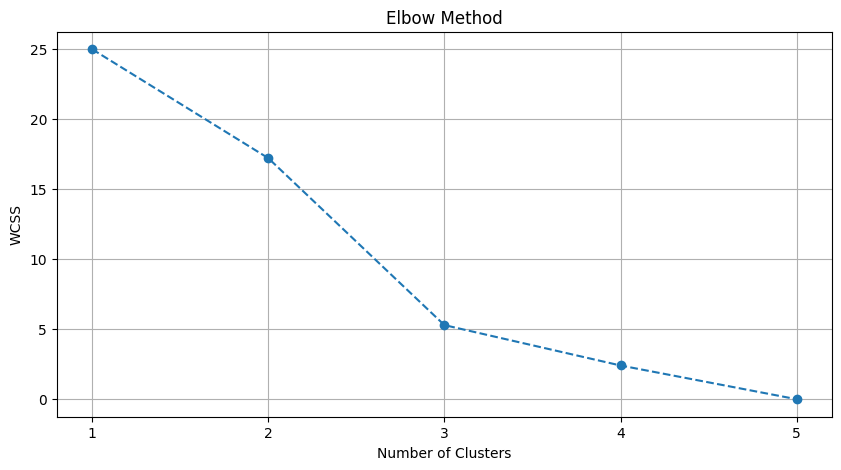

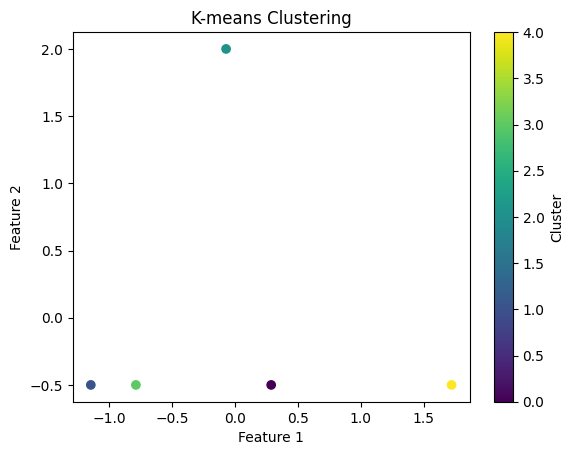

In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Assuming student_df contains the student data
student_data = {
    'Batch': [19, 20, 21, 22, 23],
    'Computer Science': [50, 60, 100, 20, 30],
    'Artificial Intelligence': [80, 40, 40, 40, 40],
    'Business Analytics': [30, 60, 50, 60, 50],
    'Software Engineering': [40, 40, 45, 55, 70],
    'Electrical Engineering': [35, 65, 50, 40, 60]
}

student_df = pd.DataFrame(student_data)

# Extracting features for clustering (excluding 'Batch' column)
X = student_df.drop('Batch', axis=1)

# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Determining Optimal Number of Clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 6):  # Trying different numbers of clusters (assuming 5 batches)
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

# K-means Clustering with the Optimal Number of Clusters
optimal_num_clusters = 5  # Suppose we determine 3 clusters to be optimal
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Visualization (for 2D visualization)
# Note: Since we have multiple features, we can't visualize all dimensions, so we'll choose two dimensions
# and plot the clusters based on those dimensions.
# You can use dimensionality reduction techniques like PCA or t-SNE for better visualization.
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [27]:
# Total number of rooms
total_rooms = 30

# Define the capacities for rooms with fixed capacities
fixed_capacities = [30, 35, 25]

# Initialize an empty list to store room capacities
room_capacities = []

# Assign fixed capacities to the first few rooms
num_fixed_capacity_rooms = len(fixed_capacities)
room_capacities.extend(fixed_capacities)

# Generate random capacities for the remaining rooms
remaining_rooms = total_rooms - num_fixed_capacity_rooms
remaining_capacity = 2500 - sum(fixed_capacities)

# Distribute the remaining capacity randomly among the remaining rooms
random_capacities = np.random.choice([25, 30, 35], size=remaining_rooms, p=[0.3, 0.4, 0.3])
room_capacities.extend(random_capacities)

print("Room Capacities:")
for i, capacity in enumerate(room_capacities, start=1):
    print(f"Room {i}: {capacity}")


Room Capacities:
Room 1: 30
Room 2: 35
Room 3: 25
Room 4: 30
Room 5: 30
Room 6: 30
Room 7: 30
Room 8: 25
Room 9: 25
Room 10: 30
Room 11: 30
Room 12: 25
Room 13: 30
Room 14: 35
Room 15: 25
Room 16: 35
Room 17: 30
Room 18: 35
Room 19: 25
Room 20: 30
Room 21: 25
Room 22: 30
Room 23: 30
Room 24: 30
Room 25: 30
Room 26: 25
Room 27: 35
Room 28: 25
Room 29: 35
Room 30: 35


In [28]:
import numpy as np
from sklearn.cluster import KMeans

# Perform k-means clustering on the student data
# Assuming you have student data and have preprocessed it

# Generate random student data for demonstration
np.random.seed(42)
student_data = np.random.rand(2500, 5)  # Example student data with 2500 students and 5 features

# Perform k-means clustering with 5 clusters (one for each batch)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(student_data)

# Define room capacities for 30 rooms
room_capacities = np.random.choice([25, 30, 35], size=30)

# Define time slots
time_slots = ["9 am to 12 pm", "1 pm to 4 pm"]

# Function to generate seating plan
def generate_seating_plan(clusters, room_capacities, time_slot):
    seating_plan = {}
    for room, capacity in enumerate(room_capacities, start=1):
        seating_plan[room] = [[] for _ in range(len(np.unique(clusters)))]
    
    for student_id, cluster_assignment in enumerate(clusters):
        current_room = 1  # Start from the first room
        while len(seating_plan[current_room][cluster_assignment]) >= room_capacities[current_room - 1]:
            current_room += 1
            if current_room > len(room_capacities):
                break
        if current_room > len(room_capacities):
            print(f"Room capacity for room {current_room} is not defined. Skipping allocation for student {student_id + 1}.")
            continue
        # Adjust the allocation if the room's capacity is reached
        if len(seating_plan[current_room][cluster_assignment]) >= room_capacities[current_room - 1]:
            print(f"Room {current_room} has reached its capacity of {room_capacities[current_room - 1]} students. Skipping allocation for student {student_id + 1}.")
            continue
        seating_plan[current_room][cluster_assignment].append(student_id + 1)
        
    return seating_plan


# Generate seating plans for each time slot
seating_plans = {}
for time_slot in time_slots:
    seating_plans[time_slot] = generate_seating_plan(clusters, room_capacities, time_slot)

# Print seating plans
for time_slot, seating_plan in seating_plans.items():
    print(f"\nSeating Plan for {time_slot}:")
    for room, seats in seating_plan.items():
        print(f"Room {room}: {seats}")



Seating Plan for 9 am to 12 pm:
Room 1: [[2, 14, 19, 23, 28, 32, 35, 43, 44, 50, 58, 65, 93, 94, 105, 110, 122, 123, 136, 142, 154, 156, 170, 183, 188, 190, 201, 205, 211, 216, 217, 252, 256, 259, 262], [12, 16, 17, 20, 25, 29, 31, 34, 45, 57, 64, 67, 69, 70, 85, 99, 106, 108, 109, 113, 120, 121, 128, 134, 140, 143, 157, 158, 164, 167, 173, 177, 178, 182, 192], [4, 5, 6, 8, 10, 13, 37, 41, 42, 47, 48, 59, 62, 72, 75, 79, 82, 88, 91, 92, 96, 103, 104, 114, 116, 118, 124, 125, 129, 138, 139, 141, 145, 146, 149], [1, 3, 11, 18, 22, 26, 30, 33, 38, 39, 40, 49, 51, 52, 54, 55, 60, 66, 68, 71, 74, 81, 83, 86, 87, 90, 102, 107, 117, 126, 127, 130, 133, 144, 147], [7, 9, 15, 21, 24, 27, 36, 46, 53, 56, 61, 63, 73, 76, 77, 78, 80, 84, 89, 95, 97, 98, 100, 101, 111, 112, 115, 119, 131, 132, 135, 137, 152, 155, 160]]
Room 2: [[265, 266, 269, 273, 277, 286, 288, 289, 298, 300, 304, 308, 309, 313, 317, 322, 327, 330, 333, 334, 336, 345, 346, 365, 367, 375, 378, 379, 381, 385], [197, 198, 199, 207,